# Tensorflow梯度计算

使用函数
```
with tf.GradientTape() as tape:
    tape.watch([])  # [] 内为constant的待计算梯度的向量
        # 注：tf.Variable自动计算梯度
    grads = tape.gradient(loss,[]) # 返回list中的变量的梯度
```




In [52]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [53]:
(x,y),(x_t,y_t) = keras.datasets.boston_housing.load_data()  # 回归

x.shape # 404,13
x_t.shape # 102,13

def normlization(data):
    return (data-np.mean(data,axis=0))/np.std(data,axis=0)
x = normlization(x)

In [78]:
print('begin')
w = tf.Variable(tf.random.normal([13,1]))
b = tf.Variable(tf.zeros([1]))
lr = 0.003  # 当loss 训练时为Nan时通常是lr不够小导致的 或者是没有做数据归一化
losses = []
for i in range(500):
    with tf.GradientTape() as tape:
        y_pred = x@w+b
        loss = tf.reduce_mean(tf.losses.MSE(y,y_pred))
        
        grads = tape.gradient(loss,[w,b])
        losses.append(loss.numpy())
    w.assign_sub(lr*grads[0])
    b.assign_sub(lr*grads[1])
    
print('finish')


begin
finish


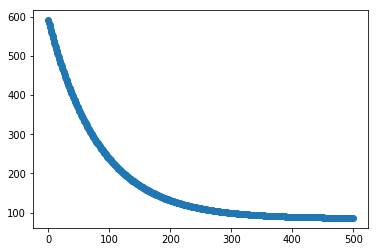

In [85]:
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(range(len(losses)),losses)
plt.show()